Found 5216 images belonging to 2 classes.


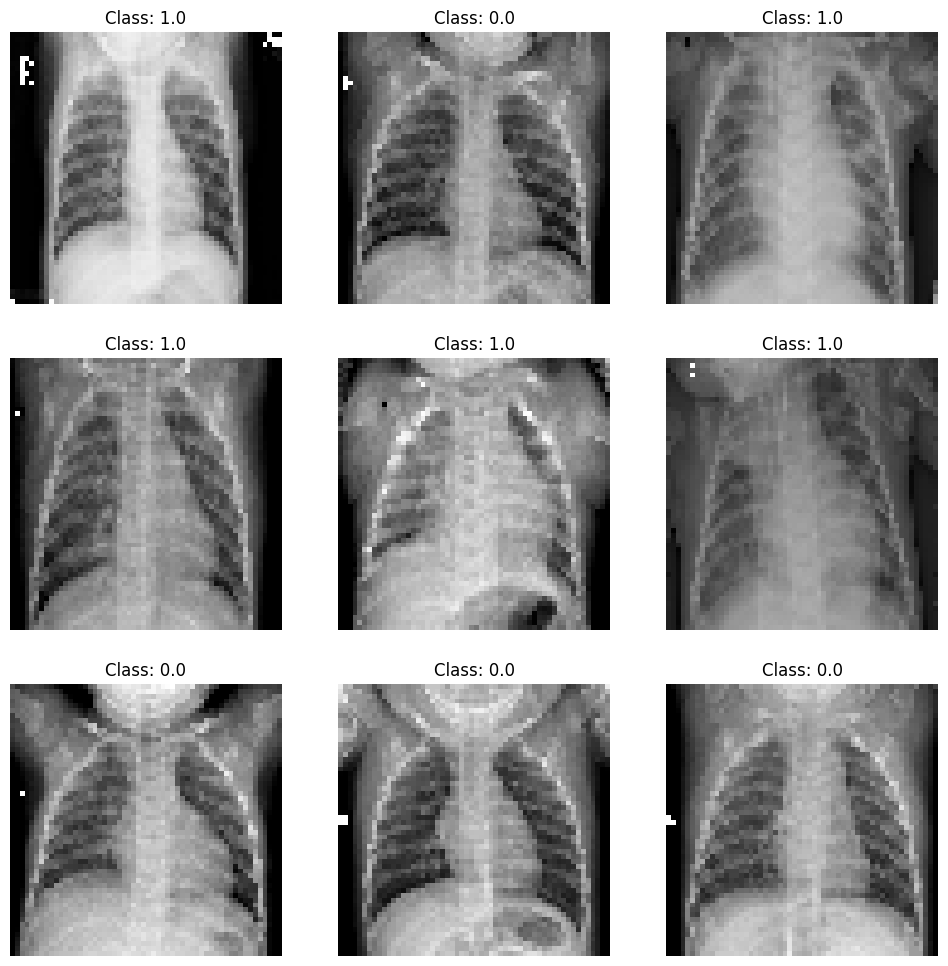

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Epoch 1/3
163/163 [==============================] - 51s 305ms/step - loss: 0.6231 - accuracy: 0.8737 - val_loss: 1.3172 - val_accuracy: 0.6747
Epoch 2/3
163/163 [==============================] - 50s 305ms/step - loss: 0.1637 - accuracy: 0.9354 - val_loss: 1.7192 - val_accuracy: 0.6651
Epoch 3/3
163/163 [==============================] - 49s 303ms/step - loss: 0.2107 - accuracy: 0.9247 - val_loss: 0.3711 - val_accuracy: 0.8429


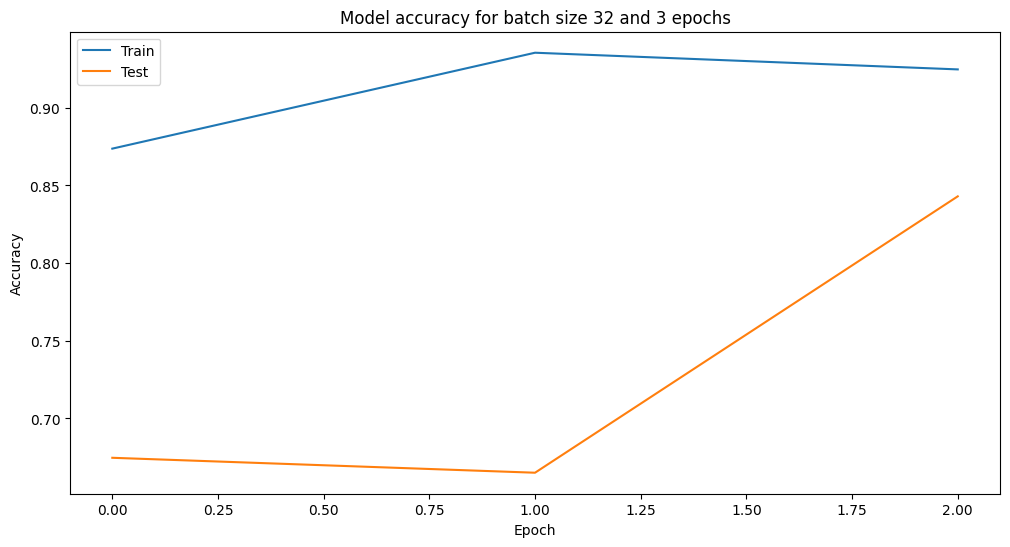

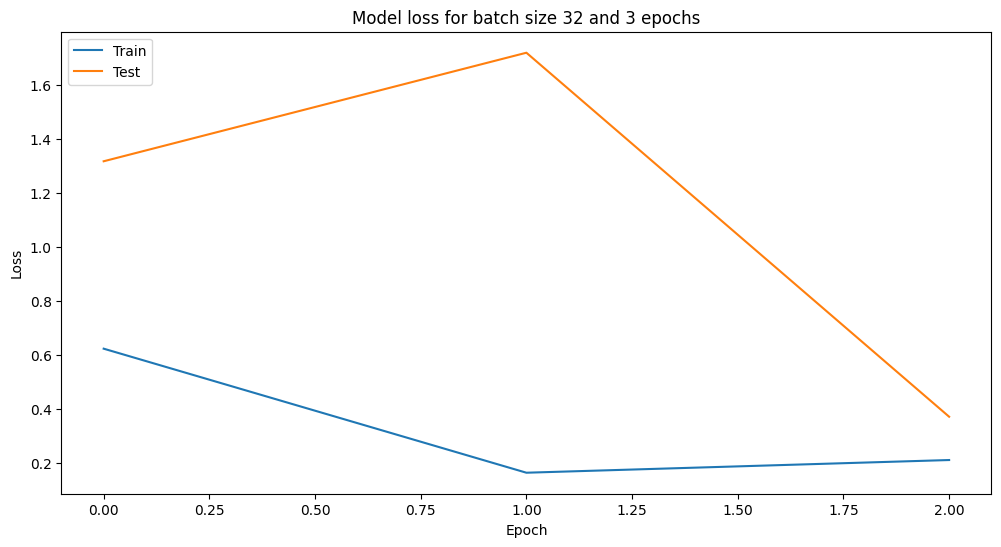

20/20 [==============================] - 5s 240ms/step - loss: 0.3711 - accuracy: 0.8429
Accuracy on the test set with batch size 32 and 3 epochs: 84.29%
Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Epoch 1/5
163/163 [==============================] - 50s 300ms/step - loss: 0.5867 - accuracy: 0.8719 - val_loss: 0.6645 - val_accuracy: 0.7821
Epoch 2/5
163/163 [==============================] - 49s 298ms/step - loss: 0.1916 - accuracy: 0.9339 - val_loss: 2.7678 - val_accuracy: 0.6442
Epoch 3/5
163/163 [==============================] - 49s 301ms/step - loss: 0.2396 - accuracy: 0.9241 - val_loss: 1.7784 - val_accuracy: 0.6891
Epoch 4/5
163/163 [==============================] - 48s 297ms/step - loss: 0.2214 - accuracy: 0.9252 - val_loss: 0.3980 - val_accuracy: 0.8574
Epoch 5/5
163/163 [==============================] - 49s 299ms/step - loss: 0.1921 - accuracy: 0.9289 - val_loss: 0.6833 - val_accuracy: 0.7740


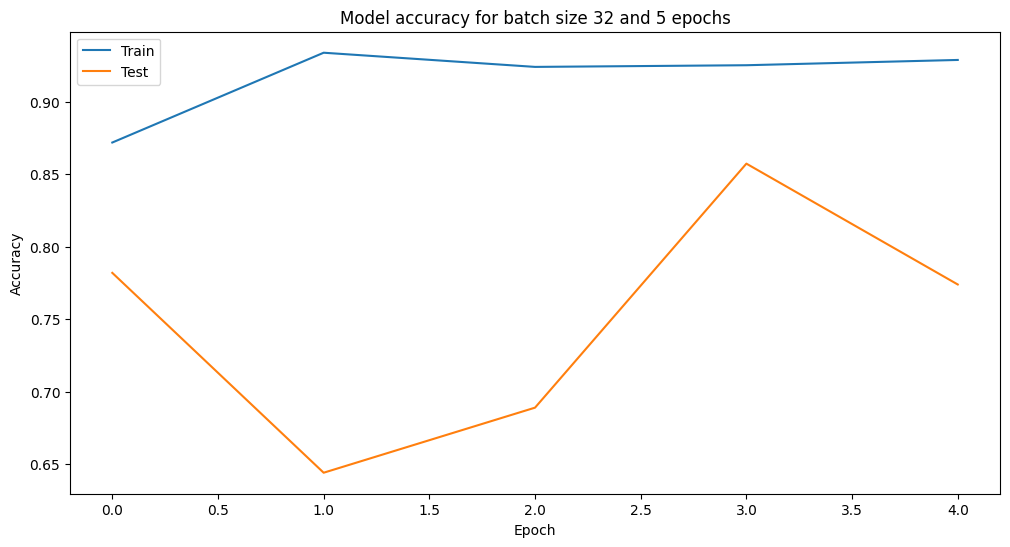

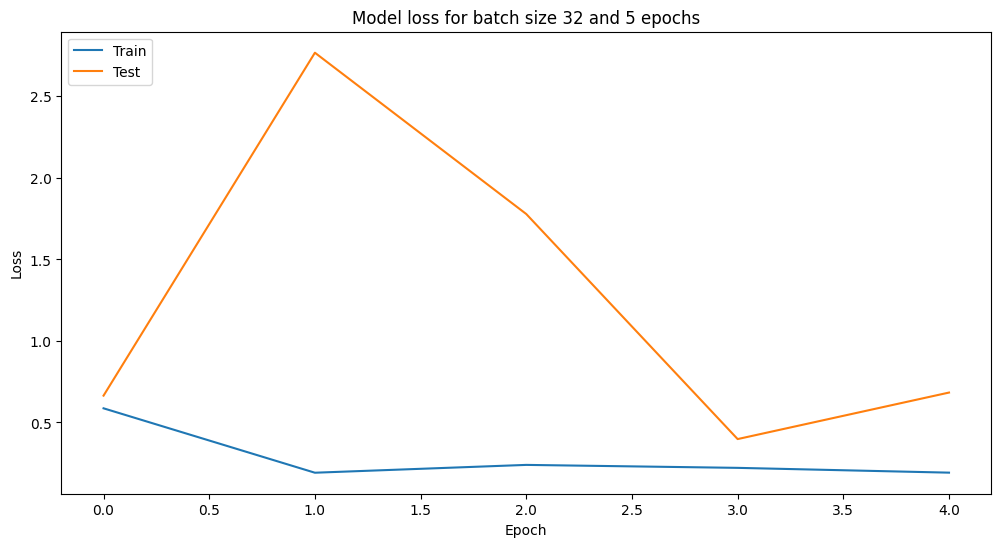

20/20 [==============================] - 5s 232ms/step - loss: 0.6833 - accuracy: 0.7740
Accuracy on the test set with batch size 32 and 5 epochs: 77.40%
Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Epoch 1/3
82/82 [==============================] - 50s 594ms/step - loss: 1.2126 - accuracy: 0.7820 - val_loss: 0.6026 - val_accuracy: 0.7067
Epoch 2/3
82/82 [==============================] - 48s 581ms/step - loss: 0.1972 - accuracy: 0.9224 - val_loss: 0.4412 - val_accuracy: 0.7933
Epoch 3/3
82/82 [==============================] - 49s 597ms/step - loss: 0.1423 - accuracy: 0.9471 - val_loss: 0.7435 - val_accuracy: 0.7196


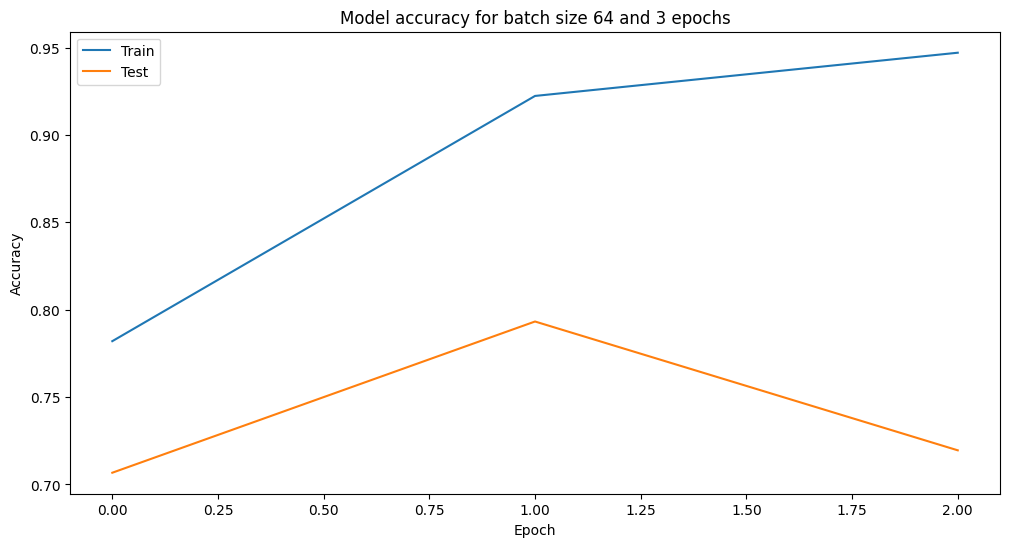

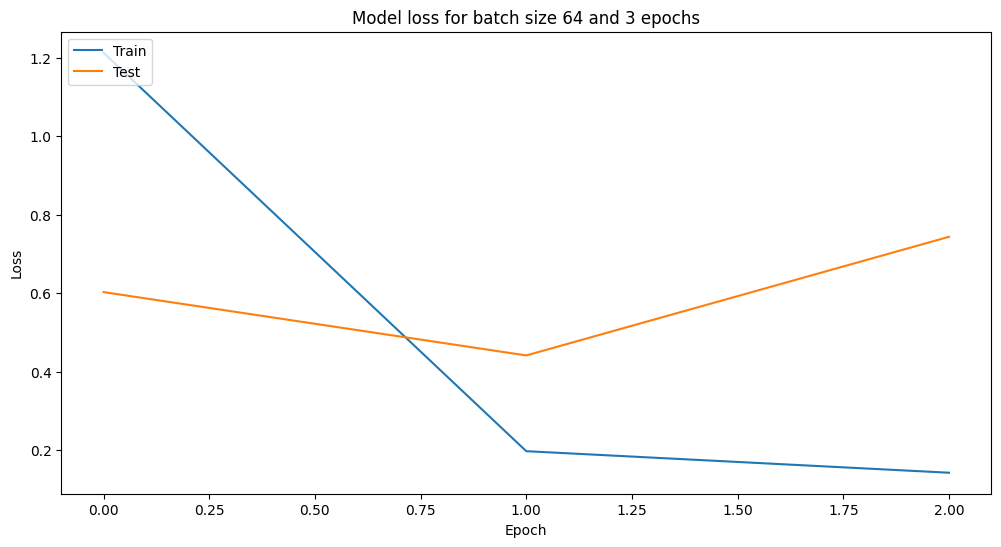

10/10 [==============================] - 5s 473ms/step - loss: 0.7435 - accuracy: 0.7196
Accuracy on the test set with batch size 64 and 3 epochs: 71.96%
Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Epoch 1/5
82/82 [==============================] - 50s 596ms/step - loss: 1.4289 - accuracy: 0.8023 - val_loss: 0.3420 - val_accuracy: 0.8397
Epoch 2/5
82/82 [==============================] - 48s 582ms/step - loss: 0.1831 - accuracy: 0.9339 - val_loss: 0.6765 - val_accuracy: 0.7324
Epoch 3/5
82/82 [==============================] - 49s 595ms/step - loss: 0.1920 - accuracy: 0.9235 - val_loss: 0.3668 - val_accuracy: 0.8317
Epoch 4/5
82/82 [==============================] - 48s 592ms/step - loss: 0.1391 - accuracy: 0.9411 - val_loss: 0.4982 - val_accuracy: 0.7965
Epoch 5/5
82/82 [==============================] - 49s 598ms/step - loss: 0.1310 - accuracy: 0.9503 - val_loss: 0.8791 - val_accuracy: 0.7260


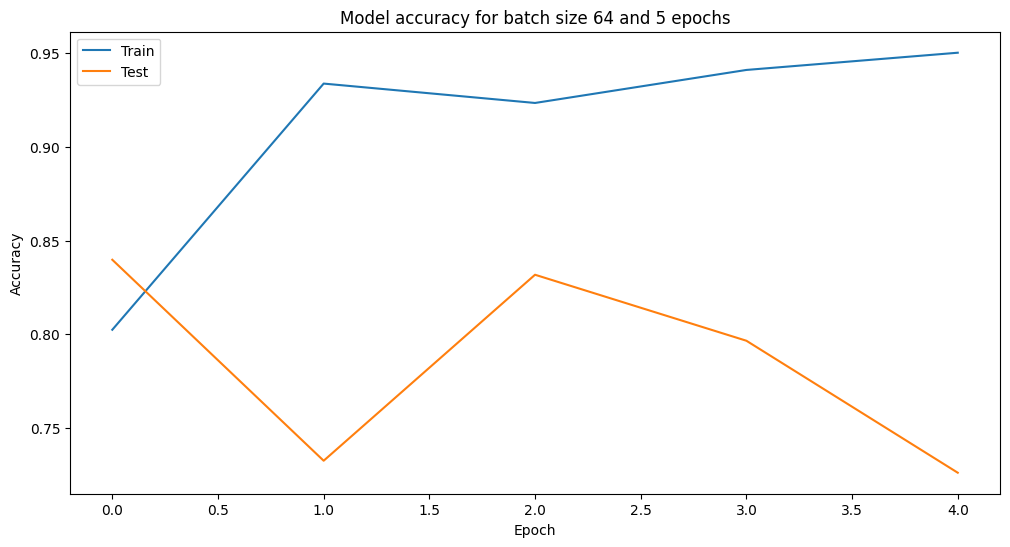

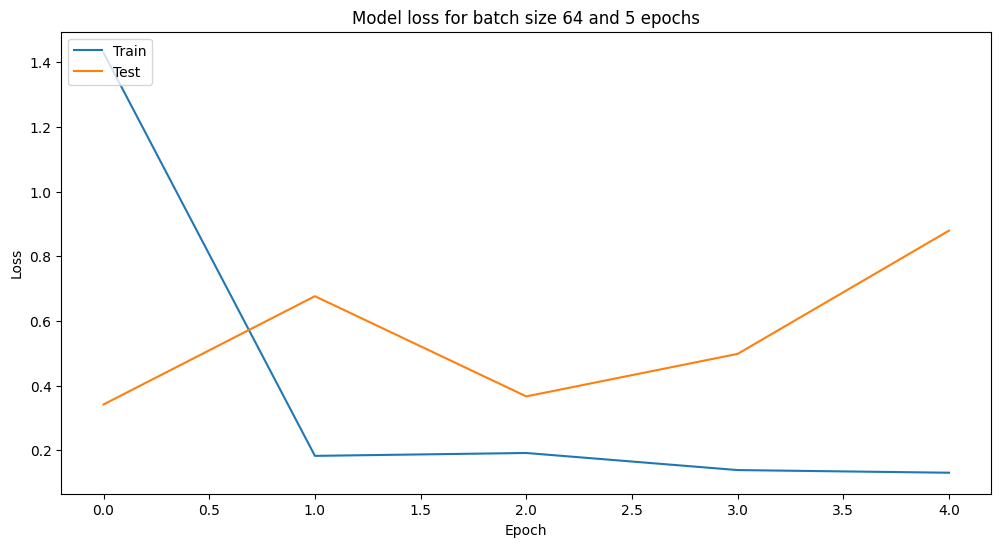

10/10 [==============================] - 5s 474ms/step - loss: 0.8791 - accuracy: 0.7260
Accuracy on the test set with batch size 64 and 5 epochs: 72.60%

Best accuracy on the test set is 84.29% with batch size 32 and 3 epochs.


In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt

# Set the random seed
np.random.seed(42)
tf.random.set_seed(42)

# Set up the data directory
data_dir = "/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/"

# Set up the ImageDataGenerator
data_gen = ImageDataGenerator(rescale=1./255)

# Load the datasets
train_generator_images = data_gen.flow_from_directory(
    data_dir+"train/",
    target_size=(56, 56),
    batch_size=64,  # Temporary batch size for displaying images
    class_mode='binary'
)

# Display some images from the train_generator
x, y = next(train_generator_images)
plt.figure(figsize=(12, 12))
for i in range(0, 9):
    plt.subplot(3, 3, i+1)
    plt.axis('off')
    plt.imshow(x[i])
    plt.title('Class: ' + str(y[i]))
plt.show()

# Hyperparameters to test
batch_sizes = [32, 64]
epochs_list = [3, 5]

best_accuracy = 0
best_batch_size = 0
best_epochs = 0

for batch_size in batch_sizes:
    for epochs in epochs_list:
        # Load the datasets
        train_generator = data_gen.flow_from_directory(
            data_dir+"train/",
            target_size=(56, 56),
            batch_size=batch_size,
            class_mode='binary'
        )

        test_generator = data_gen.flow_from_directory(
            data_dir+"test/",
            target_size=(56, 56),
            batch_size=batch_size,
            class_mode='binary'
        )

        # Create the model
        model = Sequential([
            Flatten(input_shape=(56, 56, 3)),
            Dense(512, activation='relu'),
            Dense(2, activation='softmax')
        ])

        # Compile the model
        model.compile(optimizer=Adam(learning_rate=0.001),
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])

        # Train the model
        history = model.fit(
            train_generator,
            epochs=epochs,
            validation_data=test_generator,
            verbose=1
        )

        # Plot training & validation accuracy values
        plt.figure(figsize=(12, 6))
        plt.plot(history.history['accuracy'])
        plt.plot(history.history['val_accuracy'])
        plt.title(f'Model accuracy for batch size {batch_size} and {epochs} epochs')
        plt.ylabel('Accuracy')
        plt.xlabel('Epoch')
        plt.legend(['Train', 'Test'], loc='upper left')
        plt.show()

        # Plot training & validation loss values
        plt.figure(figsize=(12, 6))
        plt.plot(history.history['loss'])
        plt.plot(history.history['val_loss'])
        plt.title(f'Model loss for batch size {batch_size} and {epochs} epochs')
        plt.ylabel('Loss')
        plt.xlabel('Epoch')
        plt.legend(['Train', 'Test'], loc='upper left')
        plt.show()

        # Evaluate the model on the test set
        loss, accuracy = model.evaluate(test_generator)
        print(f"Accuracy on the test set with batch size {batch_size} and {epochs} epochs: {accuracy:.2%}")

        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_batch_size = batch_size
            best_epochs = epochs

print(f"\nBest accuracy on the test set is {best_accuracy:.2%} with batch size {best_batch_size} and {best_epochs} epochs.")